<a href="https://colab.research.google.com/github/garfield-gray/manim/blob/main/3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre

In [1]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,075 kB]
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,324 kB]
Get:14 h

In [1]:
from manim import *
import numpy as np

Manim Community v0.17.3

#CODE


3d manimations take too long to render!

In [ ]:
%%manim -qh -v WARNING First

class First(ThreeDScene):
  def construct(self):
    ax_3d = ThreeDAxes()

    func = ax_3d.plot_parametric_curve(lambda t: np.array([np.cos(t), np.sin(t), t/2]), t_range = [-6, 6, 0.01], color = RED)


    self.add(ax_3d, func)
    self.set_camera_orientation(phi = 50*DEGREES)
    self.move_camera(theta= 50*DEGREES, run_time = 5)
    self.wait()

In [12]:
%%manim -qh -v WARNING Fir

class Fir(ThreeDScene):
  def construct(self):
    resolution_fa = 18
    ax_3d = ThreeDAxes()

    func = ax_3d.plot_parametric_curve(lambda t: np.array([np.cosh(t), np.sinh(t), 3*t]), t_range = [-2, 2, 0.01], color = RED)

    def param_surface(u, v):
      x = u
      y = (x**2-1)**0.5
      z = v
      return y
    
    surface_plane = Surface(
      lambda u, v: ax_3d.c2p(u,  param_surface(u, v), v),
        resolution=(resolution_fa, resolution_fa),
          v_range=[-6, 6],
          u_range=[1, 3],
          )
    surface_plane.set_style(fill_opacity=0.5)
  # surface_plane.set_fill_by_value(axes=axes, colorscale=[(RED, -0.5), (YELLOW, 0), (GREEN, 0.5)], axis=2)



    self.add(ax_3d, func, surface_plane)
    self.set_camera_orientation(phi = 45*DEGREES)
    self.move_camera(theta= 50*DEGREES, run_time = 5)
    self.wait()

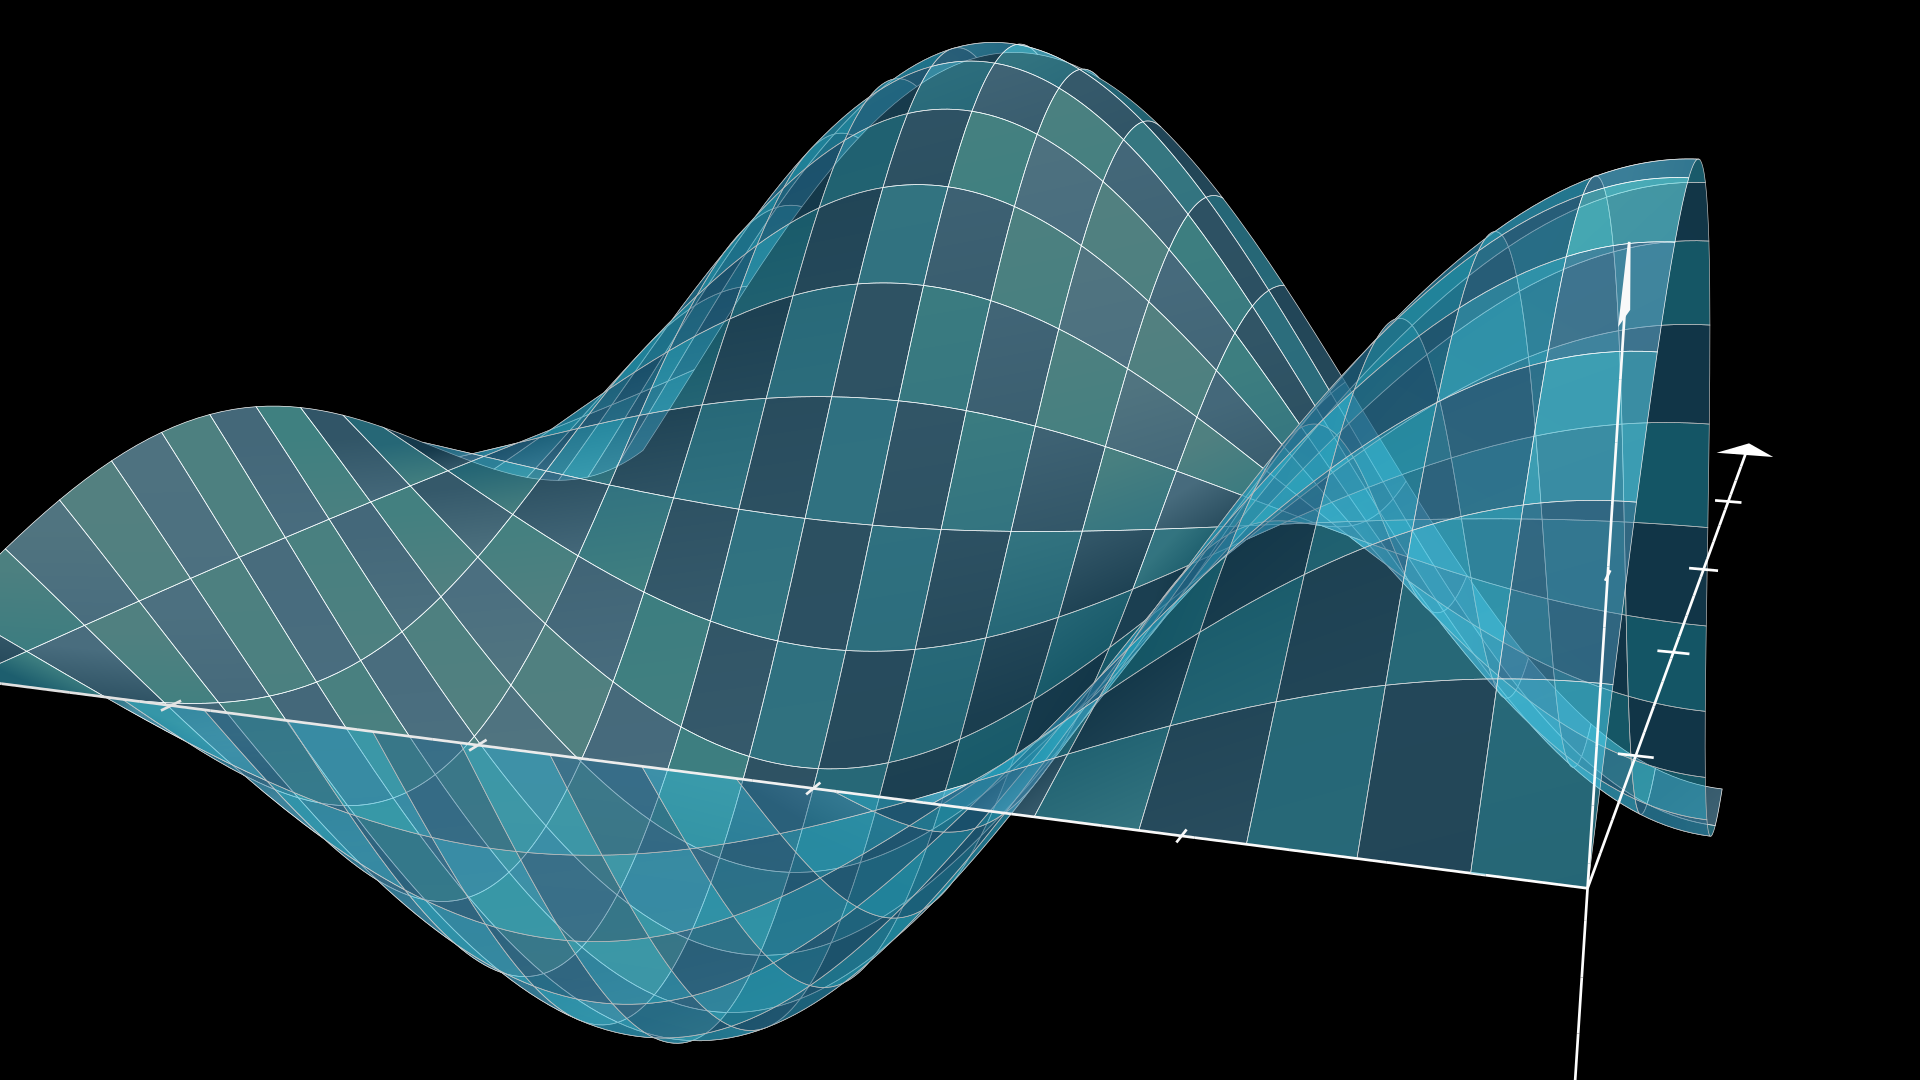

In [5]:
#surface
%%manim -qh -v WARNING FillByValueExample

class FillByValueExample(ThreeDScene):
    def construct(self):
        resolution_fa = 18
        self.set_camera_orientation(phi=75 * DEGREES, theta=-160 * DEGREES)
        axes = ThreeDAxes(x_range=(0, 5, 1), y_range=(0, 5, 1), z_range=(-1, 1, 0.5))
        def param_surface(u, v):
            x = u
            y = v
            z = np.sin(x) * np.cos(y)
            return z
        surface_plane = Surface(
            lambda u, v: axes.c2p(u, v, param_surface(u, v)),
            resolution=(resolution_fa, resolution_fa),
            v_range=[0, 5],
            u_range=[0, 5],
            )
        surface_plane.set_style(fill_opacity=0.5)
        # surface_plane.set_fill_by_value(axes=axes, colorscale=[(RED, -0.5), (YELLOW, 0), (GREEN, 0.5)], axis=2)
        self.add(axes, surface_plane)